# **Introduction**

This open dataset describes the listing activity and metrics in NYC. In this kernel, I have tried to gain insights about the price of various listings with respect to different features by visualizing data.

I hope you like this kernel and would appreciate your upvotes :)

# **Importing Packages and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [3]:
df.shape


(48895, 16)

In [4]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

# **EDA and Data Visualization**

 We can already see sum null values in the data.Let's get some more information about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Checking the number of null values in each column and printing in descending order


In [6]:
df.isnull().sum().sort_values(ascending = False)

reviews_per_month                 10052
last_review                       10052
host_name                            21
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

As we will be exploring the features that affect the price of the listing, columns like name are not relevant for our analysis.

In [7]:
df.drop(['host_name','last_review','name'],axis = 1, inplace = True)

All of the null values in the 'reviews_per_month' column corresponds to the listings where 'number_of_reviews' is equal to zero. Hence we go ahead and fill those values with 0.

In [8]:
df[df['number_of_reviews']==0].shape

(10052, 13)

In [9]:
df['reviews_per_month'].fillna(0, inplace = True)

Checking if there are any other null values left out.

In [10]:
df.isnull().sum().sort_values(ascending = False)

availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
host_id                           0
id                                0
dtype: int64

Checking the various categories which gives us an idea of how to go about with the analysis

In [11]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Grouping the neighbourhoods and having a look at the price distributions

In [13]:
n_group = df.groupby('neighbourhood_group').describe()
n_group.xs('price',axis = 1)

count        mean         std   min   25%    50%  \
neighbourhood_group                                                       
Bronx                 1091.0   87.496792  106.709349   0.0  45.0   65.0   
Brooklyn             20104.0  124.383207  186.873538   0.0  60.0   90.0   
Manhattan            21661.0  196.875814  291.383183   0.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                       75%      max  
neighbourhood_group                  
Bronx                 99.0   2500.0  
Brooklyn             150.0  10000.0  
Manhattan            220.0  10000.0  
Queens               110.0  10000.0  
Staten Island        110.0   5000.0

The price ranges from as low as 10 to as high as 10000 although the mean price remains below 200. 

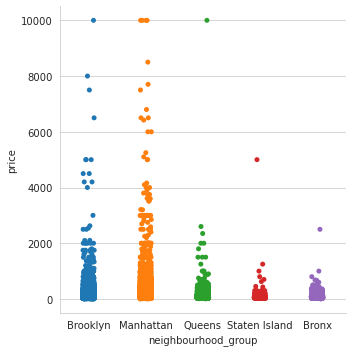

In [14]:
sns.catplot(x = 'neighbourhood_group', y = 'price', data = df)

The plot shows that although there are some high values, most of the data lies below 1000.

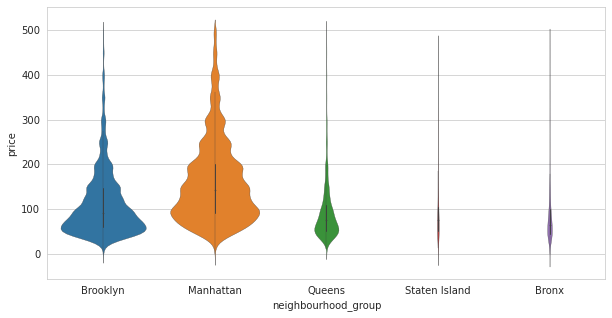

In [15]:
df1 =df[df['price']<500]
plt.figure(figsize = (10,5))
sns.violinplot(x = 'neighbourhood_group', y = 'price', data = df1, scale = 'count', linewidth = 0.3)

This violin plot is a depiction of the density and distribution of price in different neighbourhoods. The width of the violins is scaled by the number of observations in that bin. Both Brooklyn and Manhattan has many listings around the price 100 but Manhattan has more listings with a greater price.

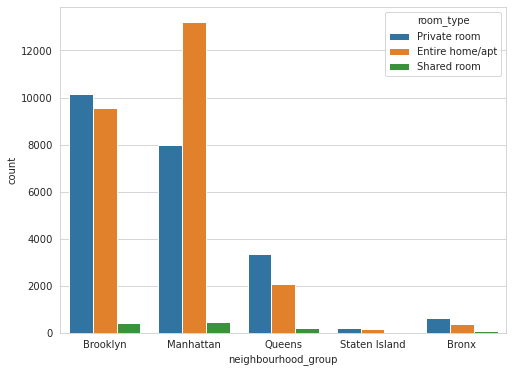

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(df['neighbourhood_group'],hue=df['room_type'])

From the plot, we can tell that Brooklyn and Manhattan are the most popular neighbourhoods with greater number of listings. Brooklyn has almost equal number of 'private room' and 'entire home' whereas Manhattan shows greater number of homes/apartments. However, when it comes to less popular areas such as Staten Island and Bronx, there's no significant difference between them.

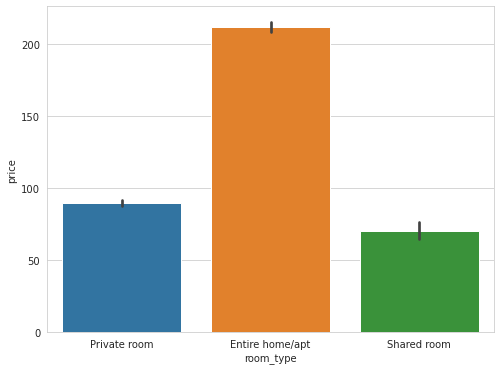

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='room_type', y='price')

As expected, homes/apartments are more expensive than private room/shared room.

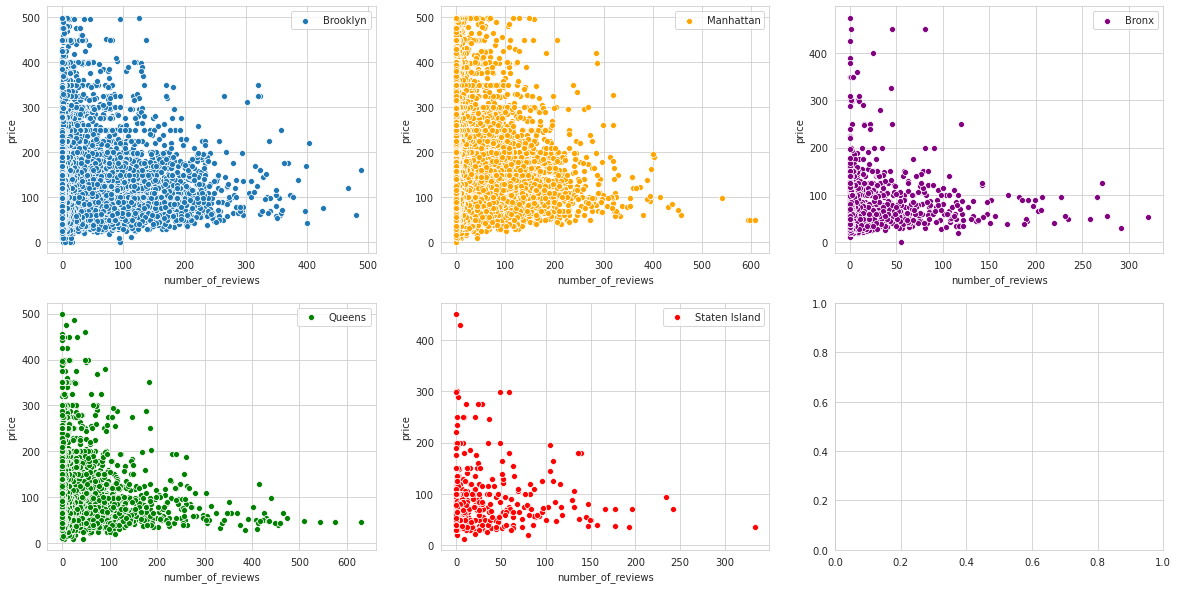

In [18]:
df2= df1.groupby('neighbourhood_group')
fig, ax = plt.subplots(2,3,figsize =(20,10))
ax = ax.flatten().T
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Brooklyn'),ax = ax[0], label ='Brooklyn')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Manhattan'),ax = ax[1],color = 'orange',label ='Manhattan')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Bronx'),ax = ax[2],color = 'purple',label ='Bronx')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Queens'),ax = ax[3],color = 'g',label ='Queens')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Staten Island'),ax = ax[4],color = 'r',label ='Staten Island')

The number of reviews shows no correlation with the price for any neighbourhood

([<matplotlib.axis.XTick at 0x7f255959cfd0>,
 [Text(0, 0, '1'),
  Text(0, 0, '5'),
  Text(0, 0, '10'),
  Text(0, 0, '15'),
  Text(0, 0, '20'),
  Text(0, 0, '25'),
  Text(0, 0, '30'),
  Text(0, 0, '35'),
  Text(0, 0, '40')])

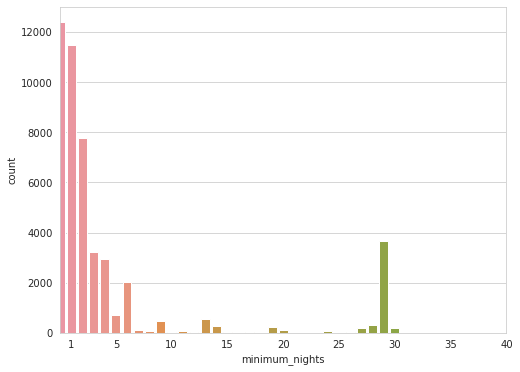

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot('minimum_nights', data = df1)
plt.xlim(0, 40)
tick = [1,5,10,15,20,25,30,35,40]
plt.xticks(tick, tick)

Most of the listings for minimum nights are less 5 days whereas some guests stay for about a month.

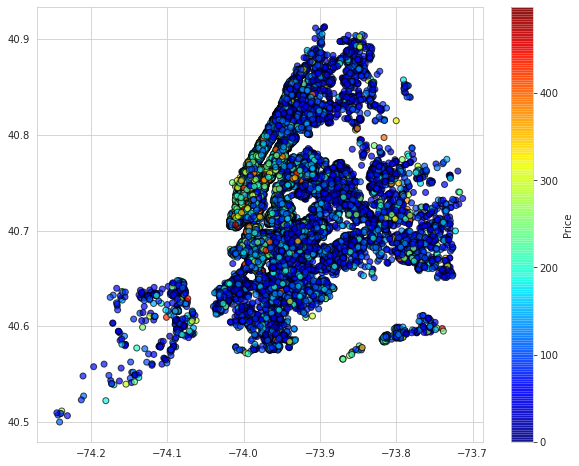

In [20]:
plt.figure(figsize= (10,8))
plt.scatter(df1.longitude, df1.latitude, c = df1.price, alpha = 0.7, cmap ='jet',edgecolor = 'black')
cbar = plt.colorbar()
cbar.set_label('Price')

As seen earlier, listings in manhattan are comparatively more expensive than others.

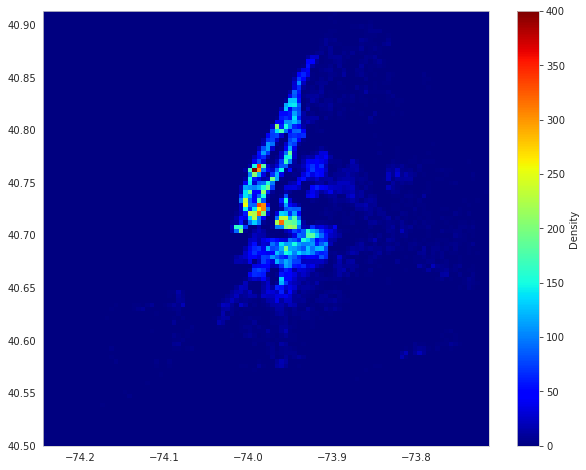

In [21]:
plt.figure(figsize= (10,8))
plt.hist2d(df1.longitude, df1.latitude, bins=(100,100),cmap =plt.cm.jet)
c_bar = plt.colorbar()
c_bar.set_label('Density')

The second plot gives us an idea about the density of the points according to the location. It can be seen that some areas in Manhatten are most dense followed by the one's in Brooklyn

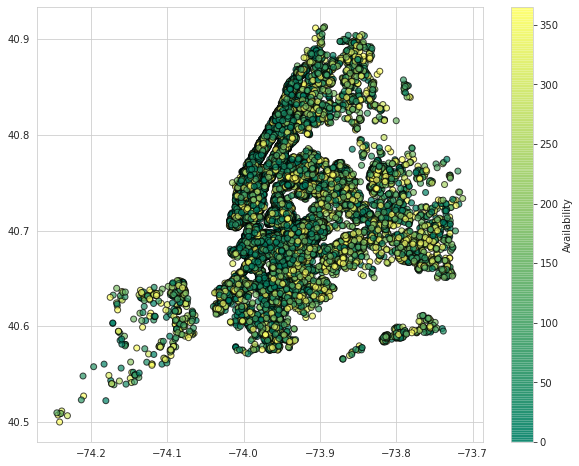

In [22]:
plt.figure(figsize= (10,8))
plt.scatter(df1.longitude, df1.latitude, c = df1.availability_365, alpha = 0.7,cmap ='summer',edgecolor = 'black')
c_bar = plt.colorbar()
c_bar.set_label('Availability')

It can be seen that availability is almost evenly distributed throughout